In [133]:
import pandas as pd
import xgboost as xgb
import numpy as np
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import make_pipeline
from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTENC
import matplotlib.pyplot as plt
from PIL import Image
from scipy.interpolate import BSpline, make_interp_spline, interp1d
# import rpy2.robjects as robjects
# from rpy2.robjects.packages import importr
import csv
from dfply import *
from xgboost import XGBClassifier
import itertools
import os
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
import time
import pickle
import math
import matplotlib.pyplot as plt
from glob import glob

import importlib

import time
import requests

from joblib import Parallel, delayed
from joblib import parallel_backend
import seaborn as sns

#import generateSHAP
import plotmeta

from scipy import interpolate
import statsmodels.api as sm
from os.path import exists
import matplotlib as mpl2
import os
import json

import dask as dd

import dataframe_image

import os
import sys
import inspect

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import UnivariateSpline

currentdir = os.path.dirname(os.path.abspath(inspect.getfile(inspect.currentframe())))
parentdir = os.path.dirname(currentdir)
sys.path.insert(0, parentdir) 


import utils_code2name
importlib.reload(utils_code2name)

<module 'utils_code2name' from '/home/hoyinchan/code/AKI_CDM_PY/utils_code2name.py'>

In [134]:
loinctranslate = pd.read_csv('/home/hoyinchan/code/AKI_CDM_PY/loinc/LoincTable/Loinc.csv', low_memory=False)

In [135]:
importlib.reload(plotmeta)
plotshapsn = plotmeta.plotmeta(order='single', interaction = 'nointeraction')
with open(plotshapsn.home_data_directory+"gamalltmp_single_nointeraction.pkl", "rb") as f:
       plotshap2 = pickle.load(f)
plotshapsn.copy(plotshap2)

/blue/yonghui.wu/hoyinchan/conda/envs/AKI_CDM_PY/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [136]:
# plotshapsn.get_meta_data_background()
# #plotshapsn.get_meta_data(filename=plotshapsn.home_data_directory+"gamalltmp_single_noAUC.json")
# plotshapsn.get_meta_data(filename="/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/"+"gamalltmp_single_noAUC.json")
# plotshapsn.load_raw_data()
# plotshapsn.cal_plot_range()
# plotshapsn.save()

In [137]:
# # Check bimodal
# datafolder = '/blue/yonghui.wu/hoyinchan/Data/data2022/'
# shap_finalX = pd.read_parquet(datafolder+'/shapalltmp.parquet')

# #df=shap_finalX[["LAB::LG32850-6(10*6/uL)_Names", "LAB::LG32850-6(10*6/uL)_vals", "site_m", "site_d"]]
# df=shap_finalX[["LAB::787-2(fL)_Names", "LAB::787-2(fL)_vals", "site_m", "site_d"]]
# df.columns = ['x','y', "site_m", "site_d"]
# df = df.dropna()

# # Create 100 bins for 'x' and 'y'
# df['x_bin'] = pd.cut(df['x'], bins=100)
# grouped = df.groupby(['x_bin', 'site_m', 'site_d']).mean().reset_index()

# grouped = grouped.dropna()

# # Display the result

# # Find the bin containing the value 2
# bins = pd.cut(df['x'], bins=100)
# bin_edges = bins.cat.categories
# bin_containing_2 = bin_edges[(bin_edges.left <= 94) & (bin_edges.right > 94)].values[0]
# filtered_grouped = grouped[grouped['x_bin'] == bin_containing_2]

# filtered_grouped.sort_values('y').groupby('site_m').mean().reset_index()

# filtered_grouped.sort_values('y').groupby('site_d').mean().reset_index()

In [138]:
plotshapsn.shapdf

,DIASTOLIC_Names,LAB::LG1314-6(mg/dL)_Names,LAB::LG49864-8(mg/dL)_Names,LAB::LG32886-0(10*3/uL)_Names,SYSTOLIC_Names,LAB::LG44868-4(g/dL)_Names,LAB::LG32857-1(10*3/uL)_Names,LAB::788-0(%)_Names,LAB::5905-5(%)_Names,LAB::713-8(%)_Names,...,LAB::LG7967-5(mg/dL)_vals,LAB::LG2807-8(mmol/L)_vals,site_m,site_d,ORIGINAL_BMI_Names,PX:CH:36415_Names,LAB::5902-2(s)_Names,ORIGINAL_BMI_vals,PX:CH:36415_vals,LAB::5902-2(s)_vals
3373243148_93264511659,63.769231,11.0,8.30,7.52,114.384615,14.7,11.17,12.80,4.8,0.9,...,-0.189039,-0.009812,UTHSCSA,UTHSCSA,NaN,None,NaN,NaN,NaN,NaN
9384454425_77255852060,64.727273,7.0,7.80,NaN,128.083333,12.6,6.24,12.60,NaN,NaN,...,0.034250,-0.009748,UTHSCSA,UTHSCSA,NaN,None,NaN,NaN,NaN,NaN
2681793168_98557103053,69.333333,18.0,8.60,NaN,125.000000,12.1,8.20,14.10,NaN,NaN,...,0.012358,-0.005361,UTHSCSA,UTHSCSA,NaN,None,NaN,NaN,NaN,NaN
4127104962_96258834516,84.322581,9.5,9.25,6.60,141.741935,9.5,12.65,13.85,4.6,2.8,...,-0.086982,-0.000414,UTHSCSA,UTHSCSA,NaN,None,NaN,NaN,NaN,NaN
2278917578_63488344354,62.600000,5.0,8.00,7.26,116.800000,11.3,6.40,13.00,9.7,0.8,...,-0.184963,0.002164,UTHSCSA,UTHSCSA,NaN,None,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PIT6775873381_5569001719528_0206,62.000000,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,...,-0.047450,0.148727,UPITT,UPITT,22.4,None,NaN,-0.123642,NaN,-0.017976
PIT6777267594_5579453999560_0404,73.000000,NaN,NaN,NaN,136.000000,NaN,NaN,NaN,8.0,1.0,...,-0.034809,0.065169,UPITT,UPITT,25.2,None,NaN,-0.068918,NaN,-0.013431
PIT6777212207_5520741930398_1001,65.000000,NaN,NaN,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,...,-0.055827,-0.317418,UPITT,UPITT,21.6,None,NaN,-0.130228,NaN,-0.019461
PIT6775947458_5035495186592_0304,54.000000,13.0,8.20,6.00,98.000000,13.6,9.90,14.40,7.0,3.0,...,0.102314,0.017858,UPITT,UPITT,46.2,None,NaN,-0.086254,NaN,-0.025069


In [139]:
pltable2 = plotshapsn.gen_fit_character()
pltable2 = pltable2.sort_values('r.sq_spline', ascending=False).reset_index(drop=True)

In [140]:
pltable2

,0,intercept_linear,slope_linear,r.sq_linear,intercept_quadratic,slope_quadratic,curvature_quadratic,r.sq_quadratic,intercept_spline,r.sq_spline,slope_auc
0,LAB::LG6657-3(mg/dL),-1.127641,1.084659e+00,0.733921,-0.904253,5.950832e-01,2.340142e-01,0.742441,-0.196460,0.915287,1.084659e+00
1,LAB::LG7967-5(mg/dL),-0.500091,3.851264e-03,0.651027,-0.967337,1.083717e-02,-2.378235e-05,0.717159,-0.028471,0.847800,3.851264e-03
2,LAB::LG6373-7(mmol/L),2.714528,-2.670525e-02,0.696221,17.166749,-3.073372e-01,1.359357e-03,0.772969,-0.051370,0.797492,-2.670525e-02
3,PX:CH:36415,0.314573,-4.361895e-01,0.782200,0.314573,-4.361895e-01,NaN,0.782200,0.314573,0.782200,-4.361895e-01
4,LAB::LG4454-7(mmol/L),0.817641,-3.497429e-02,0.646533,2.286232,-1.516962e-01,2.270944e-03,0.716982,-0.072219,0.750004,-3.497429e-02
5,LAB::LG1314-6(mg/dL),-0.228468,1.286841e-02,0.636157,-0.331434,2.571948e-02,-2.998484e-04,0.696931,-0.027750,0.744147,1.286841e-02
6,LAB::LG13614-9(mmol/L),-0.378956,4.194101e-02,0.703501,-0.329824,3.102765e-02,5.278262e-04,0.704733,0.045976,0.730817,4.194101e-02
7,LAB::LG49949-7(mg/dL),-0.327795,1.061907e-01,0.609955,-0.021246,-9.431107e-02,3.074293e-02,0.668688,0.012849,0.683548,1.061907e-01
8,LAB::LG49936-4(mmol/L),-0.293987,6.619366e-02,0.202606,3.567397,-1.894805e+00,2.460578e-01,0.601497,-0.033644,0.667637,6.619366e-02
9,LAB::LG49864-8(mg/dL),-0.391428,3.971042e-02,0.090097,12.191475,-2.884509e+00,1.690424e-01,0.602846,-0.047887,0.665075,3.971042e-02


In [141]:
# Check very low sCr patient

# datafolder = '/blue/yonghui.wu/hoyinchan/Data/data2022/'
# shap_finalX = pd.read_parquet(datafolder+'/shapalltmp.parquet')
# df=shap_finalX[["LAB::LG50024-5(mg/dL)_Names", "LAB::LG50024-5(mg/dL)_vals", "site_m", "site_d"]]
# df.columns = ['x','y', "site_m", "site_d"]
# df = df.dropna()
# df = df.sort_values('x')
# df_low = df[df['x']<0.2]
# xxx = df_low.groupby(["site_m", "site_d"]).mean().reset_index()
# xxx[xxx['site_m']==xxx['site_d']]

In [142]:
# # Step 2: Fit a spline regression
# spline = UnivariateSpline(df['x'], df['y'], s=1)  # s is the smoothing factor

# # Generate x values for the spline curve
# x_spline = np.linspace(df['x'].min(), df['x'].max(), 500)
# y_spline = spline(x_spline)

# # Step 3: Plot the raw data
# plt.scatter(df['x'], df['y'], label='Raw Data', color='blue')

# # Step 4: Plot the spline regression
# plt.plot(x_spline, y_spline, label='Spline Regression', color='red')

# # Add labels and legend
# plt.xlabel('X')
# plt.ylabel('Y')
# plt.title('Spline Regression with Raw Data Overlay')
# plt.legend()

# # Show the plot
# plt.show()

In [143]:
df_importances_stat = pd.read_pickle('../Fig2_plot_feature_importance_data.pkl')
df_importances_stat['Feature Id no unit'] = df_importances_stat.index
df_importances_stat = df_importances_stat.reset_index(drop=True)

In [144]:
# tmp_plotter_vector = plotshapsn.gen_fit_character()[[0]]
# tmp_plotter_vector['Feature Id no unit'] = tmp_plotter_vector[0].str.split('(').str[0]
# tmp_plotter_vector = tmp_plotter_vector.merge(df_importances_stat, on = 'Feature Id no unit', how='left')

# tmp_plotter_vector = tmp_plotter_vector.sort_values(['Median'], ascending=[False]).reset_index(drop=True)
# tmp_plotter_vector

# select_row = ['AGE', 'LAB::LG5903-2(mg/dL)', 'LAB::LG7967-5(mg/dL)', 'LAB::LG49936-4(mmol/L)', 'LAB::LG50024-5(mg/dL)', 'LAB::LG49864-8(mg/dL)', 'LAB::LG1314-6(mg/dL)', 'LAB::LG11363-5(mmol/L)', ]
# select_row = tmp_plotter_vector[0][0:8]

In [145]:
pltable = plotshapsn.gen_fit_character()
pltable = pltable.sort_values('r.sq_spline', ascending=False).reset_index(drop=True)
contains_px = pltable[pltable[0].str.contains('PX:')]
does_not_contain_px = pltable[~pltable[0].str.contains('PX:')]
pltable = pd.concat([does_not_contain_px, contains_px])
pltable.reset_index(drop=True, inplace=True)

In [146]:
select_row = list(pltable[0][0:8])

In [ ]:
plotshapsn.plot_fig2(select_row, nrows=3, ncols=3, margin=3, namesuffix='_main', legend_fontsize=20, fontsize=20, rescale_y=True)

0     LAB::LG49864-8(mg/dL)
1                       AGE
2     LAB::LG50041-9(mg/dL)
3             LAB::788-0(%)
4                  SYSTOLIC
5             LAB::713-8(%)
6     LAB::LG50477-5(ug/mL)
7            LAB::5905-5(%)
8            LAB::5902-2(s)
9              ORIGINAL_BMI
10                DIASTOLIC
Name: 0, dtype: object
LAB::LG49864-8(mg/dL)
(6.5, 10.6)
6.5 10.6
0     LAB::LG49864-8(mg/dL)
1                       AGE
2     LAB::LG50041-9(mg/dL)
3             LAB::788-0(%)
4                  SYSTOLIC
5             LAB::713-8(%)
6     LAB::LG50477-5(ug/mL)
7            LAB::5905-5(%)
8            LAB::5902-2(s)
9              ORIGINAL_BMI
10                DIASTOLIC
Name: 0, dtype: object
AGE
(17, 90)
17.0 90.0
0     LAB::LG49864-8(mg/dL)
1                       AGE
2     LAB::LG50041-9(mg/dL)
3             LAB::788-0(%)
4                  SYSTOLIC
5             LAB::713-8(%)
6     LAB::LG50477-5(ug/mL)
7            LAB::5905-5(%)
8            LAB::5902-2(s)
9              ORIGI

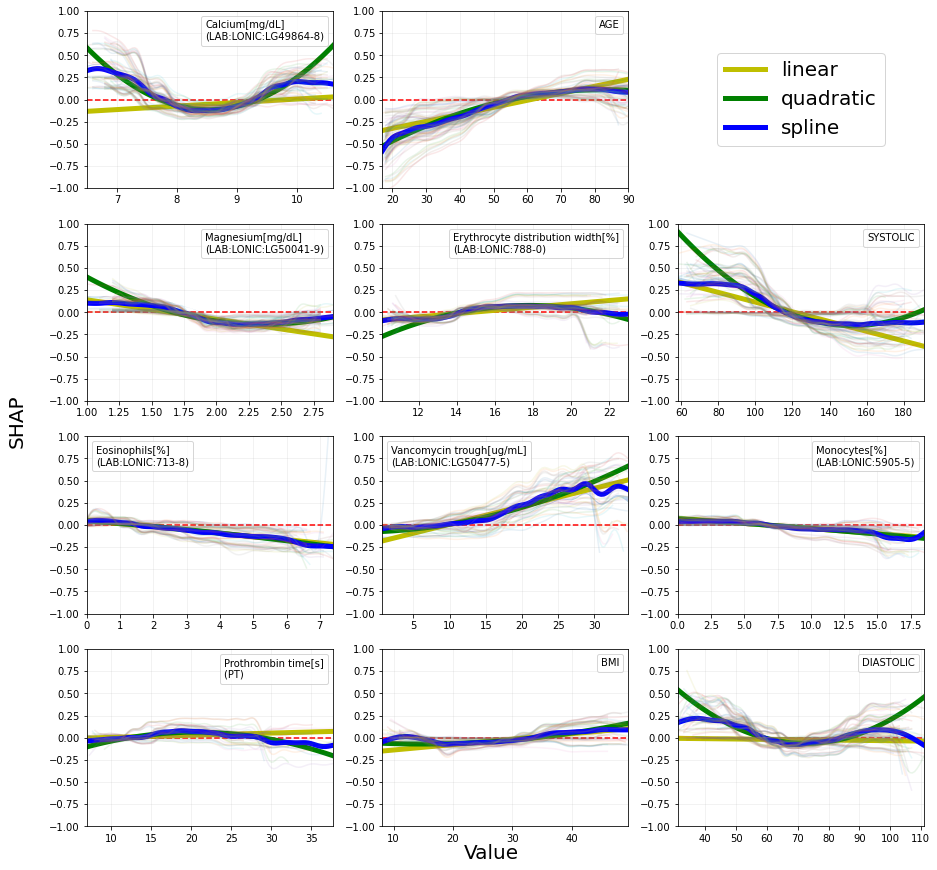

In [32]:
remain_row = pltable[0][8:19].reset_index(drop=True)
plotshapsn.plot_fig2(remain_row, nrows=4, ncols=3, margin=3, namesuffix='_supp1', legend_fontsize=20, fontsize=20, rescale_y=True)

0     LAB::LG32863-9(10*3/uL)
1      LAB::LG11363-5(mmol/L)
2            LAB::786-4(g/dL)
3              LAB::4544-3(%)
4     LAB::LG32857-1(10*3/uL)
5       LAB::LG2807-8(mmol/L)
6     LAB::LG32886-0(10*3/uL)
7     LAB::LG32850-6(10*6/uL)
8        LAB::LG44868-4(g/dL)
9     LAB::LG32892-8(10*3/uL)
10                PX:CH:36415
Name: 0, dtype: object
LAB::LG32863-9(10*3/uL)
(0, 2990000)
0.0 2990000.0
0     LAB::LG32863-9(10*3/uL)
1      LAB::LG11363-5(mmol/L)
2            LAB::786-4(g/dL)
3              LAB::4544-3(%)
4     LAB::LG32857-1(10*3/uL)
5       LAB::LG2807-8(mmol/L)
6     LAB::LG32886-0(10*3/uL)
7     LAB::LG32850-6(10*6/uL)
8        LAB::LG44868-4(g/dL)
9     LAB::LG32892-8(10*3/uL)
10                PX:CH:36415
Name: 0, dtype: object
LAB::LG11363-5(mmol/L)
(126, 150)
126.0 150.0
0     LAB::LG32863-9(10*3/uL)
1      LAB::LG11363-5(mmol/L)
2            LAB::786-4(g/dL)
3              LAB::4544-3(%)
4     LAB::LG32857-1(10*3/uL)
5       LAB::LG2807-8(mmol/L)
6     LAB::LG3288

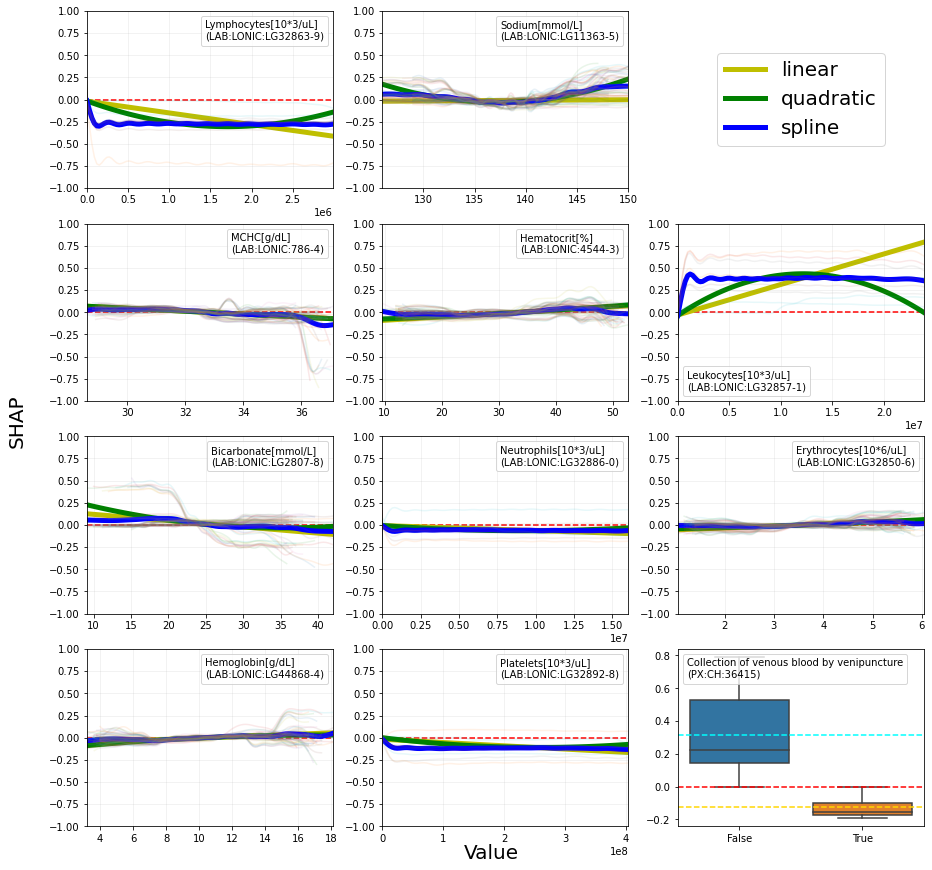

In [33]:
remain_row = pltable[0][19:].reset_index(drop=True)
plotshapsn.plot_fig2(remain_row, nrows=4, ncols=3, margin=3, namesuffix='_supp2', legend_fontsize=20, fontsize=20, rescale_y=True)

In [218]:
pd.options.display.float_format = '{:.7f}'.format
plotshapsn.gen_supp_table1_fit('linear').astype(float).round(7).sort_values('r.sq',ascending=False)

,intercept,slope,r.sq
0,,,
Creatinine[mg/dL] (LAB:LONIC:LG6657-3),-1.1276414,1.0846594,0.7339211
Anion gap[mmol/L] (LAB:LONIC:LG13614-9),-0.3789561,0.0419410,0.7035009
Chloride[mmol/L] (LAB:LONIC:LG6373-7),2.7145285,-0.0267053,0.6962211
Glucose[mg/dL] (LAB:LONIC:LG7967-5),-0.5000911,0.0038513,0.6510272
Carbon dioxide[mmol/L] (LAB:LONIC:LG4454-7),0.8176410,-0.0349743,0.6465330
Urea nitrogen[mg/dL] (LAB:LONIC:LG1314-6),-0.2284675,0.0128684,0.6361570
Phosphate[mg/dL] (LAB:LONIC:LG49949-7),-0.3277952,0.1061907,0.6099552
AGE,-0.4840450,0.0079214,0.5628581
Eosinophils[%] (LAB:LONIC:713-8),0.0516463,-0.0364750,0.5140343


In [219]:
plotshapsn.gen_supp_table1_fit('quadratic').astype(float).round(7).sort_values('r.sq',ascending=False)

,intercept,slope,curvature,r.sq
0,,,,
Chloride[mmol/L] (LAB:LONIC:LG6373-7),17.1667489,-0.3073372,0.0013594,0.7729691
Creatinine[mg/dL] (LAB:LONIC:LG6657-3),-0.9042534,0.5950832,0.2340142,0.7424414
Glucose[mg/dL] (LAB:LONIC:LG7967-5),-0.9673367,0.0108372,-0.0000238,0.7171592
Carbon dioxide[mmol/L] (LAB:LONIC:LG4454-7),2.2862322,-0.1516962,0.0022709,0.7169816
Anion gap[mmol/L] (LAB:LONIC:LG13614-9),-0.3298240,0.0310277,0.0005278,0.7047333
Urea nitrogen[mg/dL] (LAB:LONIC:LG1314-6),-0.3314335,0.0257195,-0.0002998,0.6969313
Phosphate[mg/dL] (LAB:LONIC:LG49949-7),-0.0212457,-0.0943111,0.0307429,0.6686879
AGE,-0.8995648,0.0245017,-0.0001484,0.6410513
Calcium[mg/dL] (LAB:LONIC:LG49864-8),12.1914748,-2.8845091,0.1690424,0.6028460


In [220]:
plotshapsn.gen_supp_table1_fit('spline').round(7).sort_values('r.sq',ascending=False)

,intercept,r.sq
0,,
Creatinine[mg/dL] (LAB:LONIC:LG6657-3),-0.1964600,0.9152868
Glucose[mg/dL] (LAB:LONIC:LG7967-5),-0.0284707,0.8478003
Chloride[mmol/L] (LAB:LONIC:LG6373-7),-0.0513699,0.7974916
Carbon dioxide[mmol/L] (LAB:LONIC:LG4454-7),-0.0722191,0.7500038
Urea nitrogen[mg/dL] (LAB:LONIC:LG1314-6),-0.0277501,0.7441468
Anion gap[mmol/L] (LAB:LONIC:LG13614-9),0.0459761,0.7308167
Phosphate[mg/dL] (LAB:LONIC:LG49949-7),0.0128489,0.6835476
Potassium[mmol/L] (LAB:LONIC:LG49936-4),-0.0336439,0.6676370
Calcium[mg/dL] (LAB:LONIC:LG49864-8),-0.0478868,0.6650750


In [147]:
outtable = plotshapsn.gen_fit_character()

In [148]:
outtable.sort_values('r.sq_spline', ascending=False).head(10)[0]

14      LAB::LG6657-3(mg/dL)
26      LAB::LG7967-5(mg/dL)
12     LAB::LG6373-7(mmol/L)
28               PX:CH:36415
13     LAB::LG4454-7(mmol/L)
2       LAB::LG1314-6(mg/dL)
23    LAB::LG13614-9(mmol/L)
11     LAB::LG49949-7(mg/dL)
22    LAB::LG49936-4(mmol/L)
3      LAB::LG49864-8(mg/dL)
Name: 0, dtype: object

In [149]:
# Convert to R string using Chatgpt

In [150]:
plotshapsn.gen_fit_character()[[0, 'r.sq_spline', 'slope_auc']].sort_values('r.sq_spline')

,0,r.sq_spline,slope_auc
21,LAB::LG32892-8(10*3/uL),0.158764,-3.698702e-10
6,LAB::LG44868-4(g/dL),0.167897,7.344453e-03
25,LAB::LG32850-6(10*6/uL),0.208770,2.138426e-02
4,LAB::LG32886-0(10*3/uL),0.213290,-5.669077e-09
27,LAB::LG2807-8(mmol/L),0.249582,-7.070022e-03
7,LAB::LG32857-1(10*3/uL),0.273339,3.445095e-08
15,LAB::4544-3(%),0.324896,3.816853e-03
16,LAB::786-4(g/dL),0.394895,-1.663287e-02
17,LAB::LG11363-5(mmol/L),0.396182,7.071031e-04
24,LAB::LG32863-9(10*3/uL),0.424616,-1.318510e-07


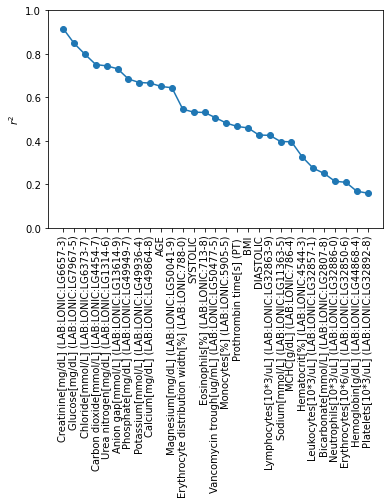

In [151]:
plotshapsn.plot_r2_rank()

In [ ]:
# # Deduplicates

# xxx = pd.read_pickle('/home/hoyinchan/blue/program_data/AKI_CDM_PY/MetaRegression/gamalltmp_double_interaction_noAUC_json.pkl')

# xxx['feature1'] = xxx['feature1'].explode()
# xxx['feature2'] = xxx['feature2'].explode()

# # Create standardized columns by sorting the pair (feature1, feature2) for each row
# xxx['sorted_feature1'] = xxx[['feature1', 'feature2']].min(axis=1)
# xxx['sorted_feature2'] = xxx[['feature1', 'feature2']].max(axis=1)

# duplicates = xxx[xxx.duplicated(subset=['sorted_feature1', 'sorted_feature2'], keep=False)]

# duplicates.iloc[1]['file_source']

In [152]:
plotshapsn.gen_fit_character()[[0, 'r.sq_spline', 'slope_auc']].sort_values('r.sq_spline')

,0,r.sq_spline,slope_auc
21,LAB::LG32892-8(10*3/uL),0.158764,-3.698702e-10
6,LAB::LG44868-4(g/dL),0.167897,7.344453e-03
25,LAB::LG32850-6(10*6/uL),0.208770,2.138426e-02
4,LAB::LG32886-0(10*3/uL),0.213290,-5.669077e-09
27,LAB::LG2807-8(mmol/L),0.249582,-7.070022e-03
7,LAB::LG32857-1(10*3/uL),0.273339,3.445095e-08
15,LAB::4544-3(%),0.324896,3.816853e-03
16,LAB::786-4(g/dL),0.394895,-1.663287e-02
17,LAB::LG11363-5(mmol/L),0.396182,7.071031e-04
24,LAB::LG32863-9(10*3/uL),0.424616,-1.318510e-07


In [221]:
plotshapsn.combine_interaction_json(path='/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/gam2d_tmp/')

In [238]:
top10f = plotshapsn.gen_interaction_shapalltmp(top=16)

In [248]:
top10f

14      LAB::LG6657-3(mg/dL)
26      LAB::LG7967-5(mg/dL)
12     LAB::LG6373-7(mmol/L)
28               PX:CH:36415
13     LAB::LG4454-7(mmol/L)
2       LAB::LG1314-6(mg/dL)
23    LAB::LG13614-9(mmol/L)
11     LAB::LG49949-7(mg/dL)
22    LAB::LG49936-4(mmol/L)
3      LAB::LG49864-8(mg/dL)
19                       AGE
18     LAB::LG50041-9(mg/dL)
8              LAB::788-0(%)
5                   SYSTOLIC
10             LAB::713-8(%)
20     LAB::LG50477-5(ug/mL)
Name: 0, dtype: object

In [224]:
filepath = "/home/hoyinchan/blue/program_data/AKI_CDM_PY/MetaRegression/"

In [348]:
importlib.reload(plotmeta)
plotshapdi = plotmeta.plotmeta(order='double', interaction = 'interaction')
plotshapdi.get_meta_data()
# with open(filepath+"gamalltmp_double_interaction.pkl", "rb") as f:
#        plotshap2 = pickle.load(f)
# plotshapdi.copy(plotshap2)

/blue/yonghui.wu/hoyinchan/conda/envs/AKI_CDM_PY/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3343: DtypeWarning: Columns (5,6,9) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [365]:
#fig, ax = plotshapdi.plot_fig3_cont(ext_obj=plotshapsn, min_r2=0.1, plottype='subtract', numrow=15, best_plot=True, external_select=top10f, ncol=3, suffix='_contour_maxy', contour=True, figsize=(40,50), font_ratio=2, mode='max_y')
#plotshapdi.r2_histogram_interaction(ext_obj=plotshapsn)
#fig, ax = plotshapdi.plot_fig3_cont(ext_obj=plotshapsn, min_r2=0.1, plottype='interactonly', numrow=15, best_plot=True, external_select=top10f, ncol=3, suffix='_interactonly_maxy', figsize=(40,50), font_ratio=2, mode='max_max')
#fig, ax = plotshapdi.plot_fig3_cont(ext_obj=plotshapsn, min_r2=0, plottype='addition', numrow=15, best_plot=True, external_select=top10f, ncol=3, suffix='_interacton_uni_maxy', figsize=(40,50), font_ratio=2, mode='max_y')
pd.options.display.float_format = '{:.7f}'.format
#plotshapdi.gen_supp_table2_fit(ext_obj=plotshapsn, best_plot=True, external_select=top10f, mode='max_max').drop('r.sq_diff', axis=1).sort_values('r.sq',ascending=False)
plotshapdi.gen_supp_table2_fit_cat(self, target_cat=None).sort_values('r.sq',ascending=False)
#fig,ax = plotshapdi.plot_fig3_cat(ext_obj=plotshapsn, numrow=8, figsize=(40,40), font_ratio=1.18, external_select=top10f, mode='max_y', mode2='nouni', suffix='_nouni')
#fig,ax = plotshapdi.plot_fig3_cat(ext_obj=plotshapsn, numrow=8, figsize=(40,40), font_ratio=1.18, external_select=top10f, mode='max_y', mode2='all')
#fig,ax = plotshapdi.plot_fig3_cat(ext_obj=plotshapsn, numrow=8, figsize=(40,40), font_ratio=1.18, external_select=top10f, mode='max_y', mode2='interact', suffix='_interact')

# fig, ax = plotshapdi.plot_fig3_cont(ext_obj=plotshapsn, min_r2=0, plottype='interactonly', numrow=15, best_plot=True, external_select=top10f, ncol=3, suffix='_interacton_uni_max_y', figsize=(40,50), font_ratio=2, mode='max_y', rescale=(-0.3,0.3), contour=False)
# fig, ax = plotshapdi.plot_fig3_cont(ext_obj=plotshapsn, min_r2=0, plottype='addition', numrow=15, best_plot=True, external_select=top10f, ncol=3, suffix='_interactonly_max_y', figsize=(40,50), font_ratio=2, mode='max_y', rescale=(-1,1), contour=False)
# fig, ax = plotshapdi.plot_fig3_cont(ext_obj=plotshapsn, min_r2=0, plottype='addition', numrow=15, best_plot=True, external_select=top10f, ncol=3, suffix='_contour_max_y', figsize=(40,50), font_ratio=2, mode='max_y', rescale=None, contour=True)

/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1677: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.index = dff[-1]
/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff=dff.drop(-1, axis=1)
/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1679: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

,-1,intercept,interaction_intercept,r.sq
0,,,,
PX:CH:36415,ORIGINAL_BMI,0.3005586,-0.4467059,0.7519202
PX:CH:36415,LAB::LG1314-6(mg/dL),0.2867546,-0.4357481,0.7827167
PX:CH:36415,LAB::LG49949-7(mg/dL),0.3048430,-0.4063698,0.7854123
PX:CH:36415,LAB::LG50477-5(ug/mL),0.3329021,-0.3156269,0.6736715
PX:CH:36415,LAB::LG13614-9(mmol/L),0.2935247,-0.3923937,0.6739725
PX:CH:36415,LAB::788-0(%),0.4072924,-0.5384763,0.8572973
PX:CH:36415,LAB::LG50041-9(mg/dL),0.2069354,-0.3976390,0.7730089
PX:CH:36415,LAB::713-8(%),0.2549172,-0.3747820,0.7451524
PX:CH:36415,LAB::LG6657-3(mg/dL),0.0976566,-0.4089278,0.8771373


/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1677: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff.index = dff[-1]
/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1678: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff=dff.drop(-1, axis=1)
/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1679: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the document

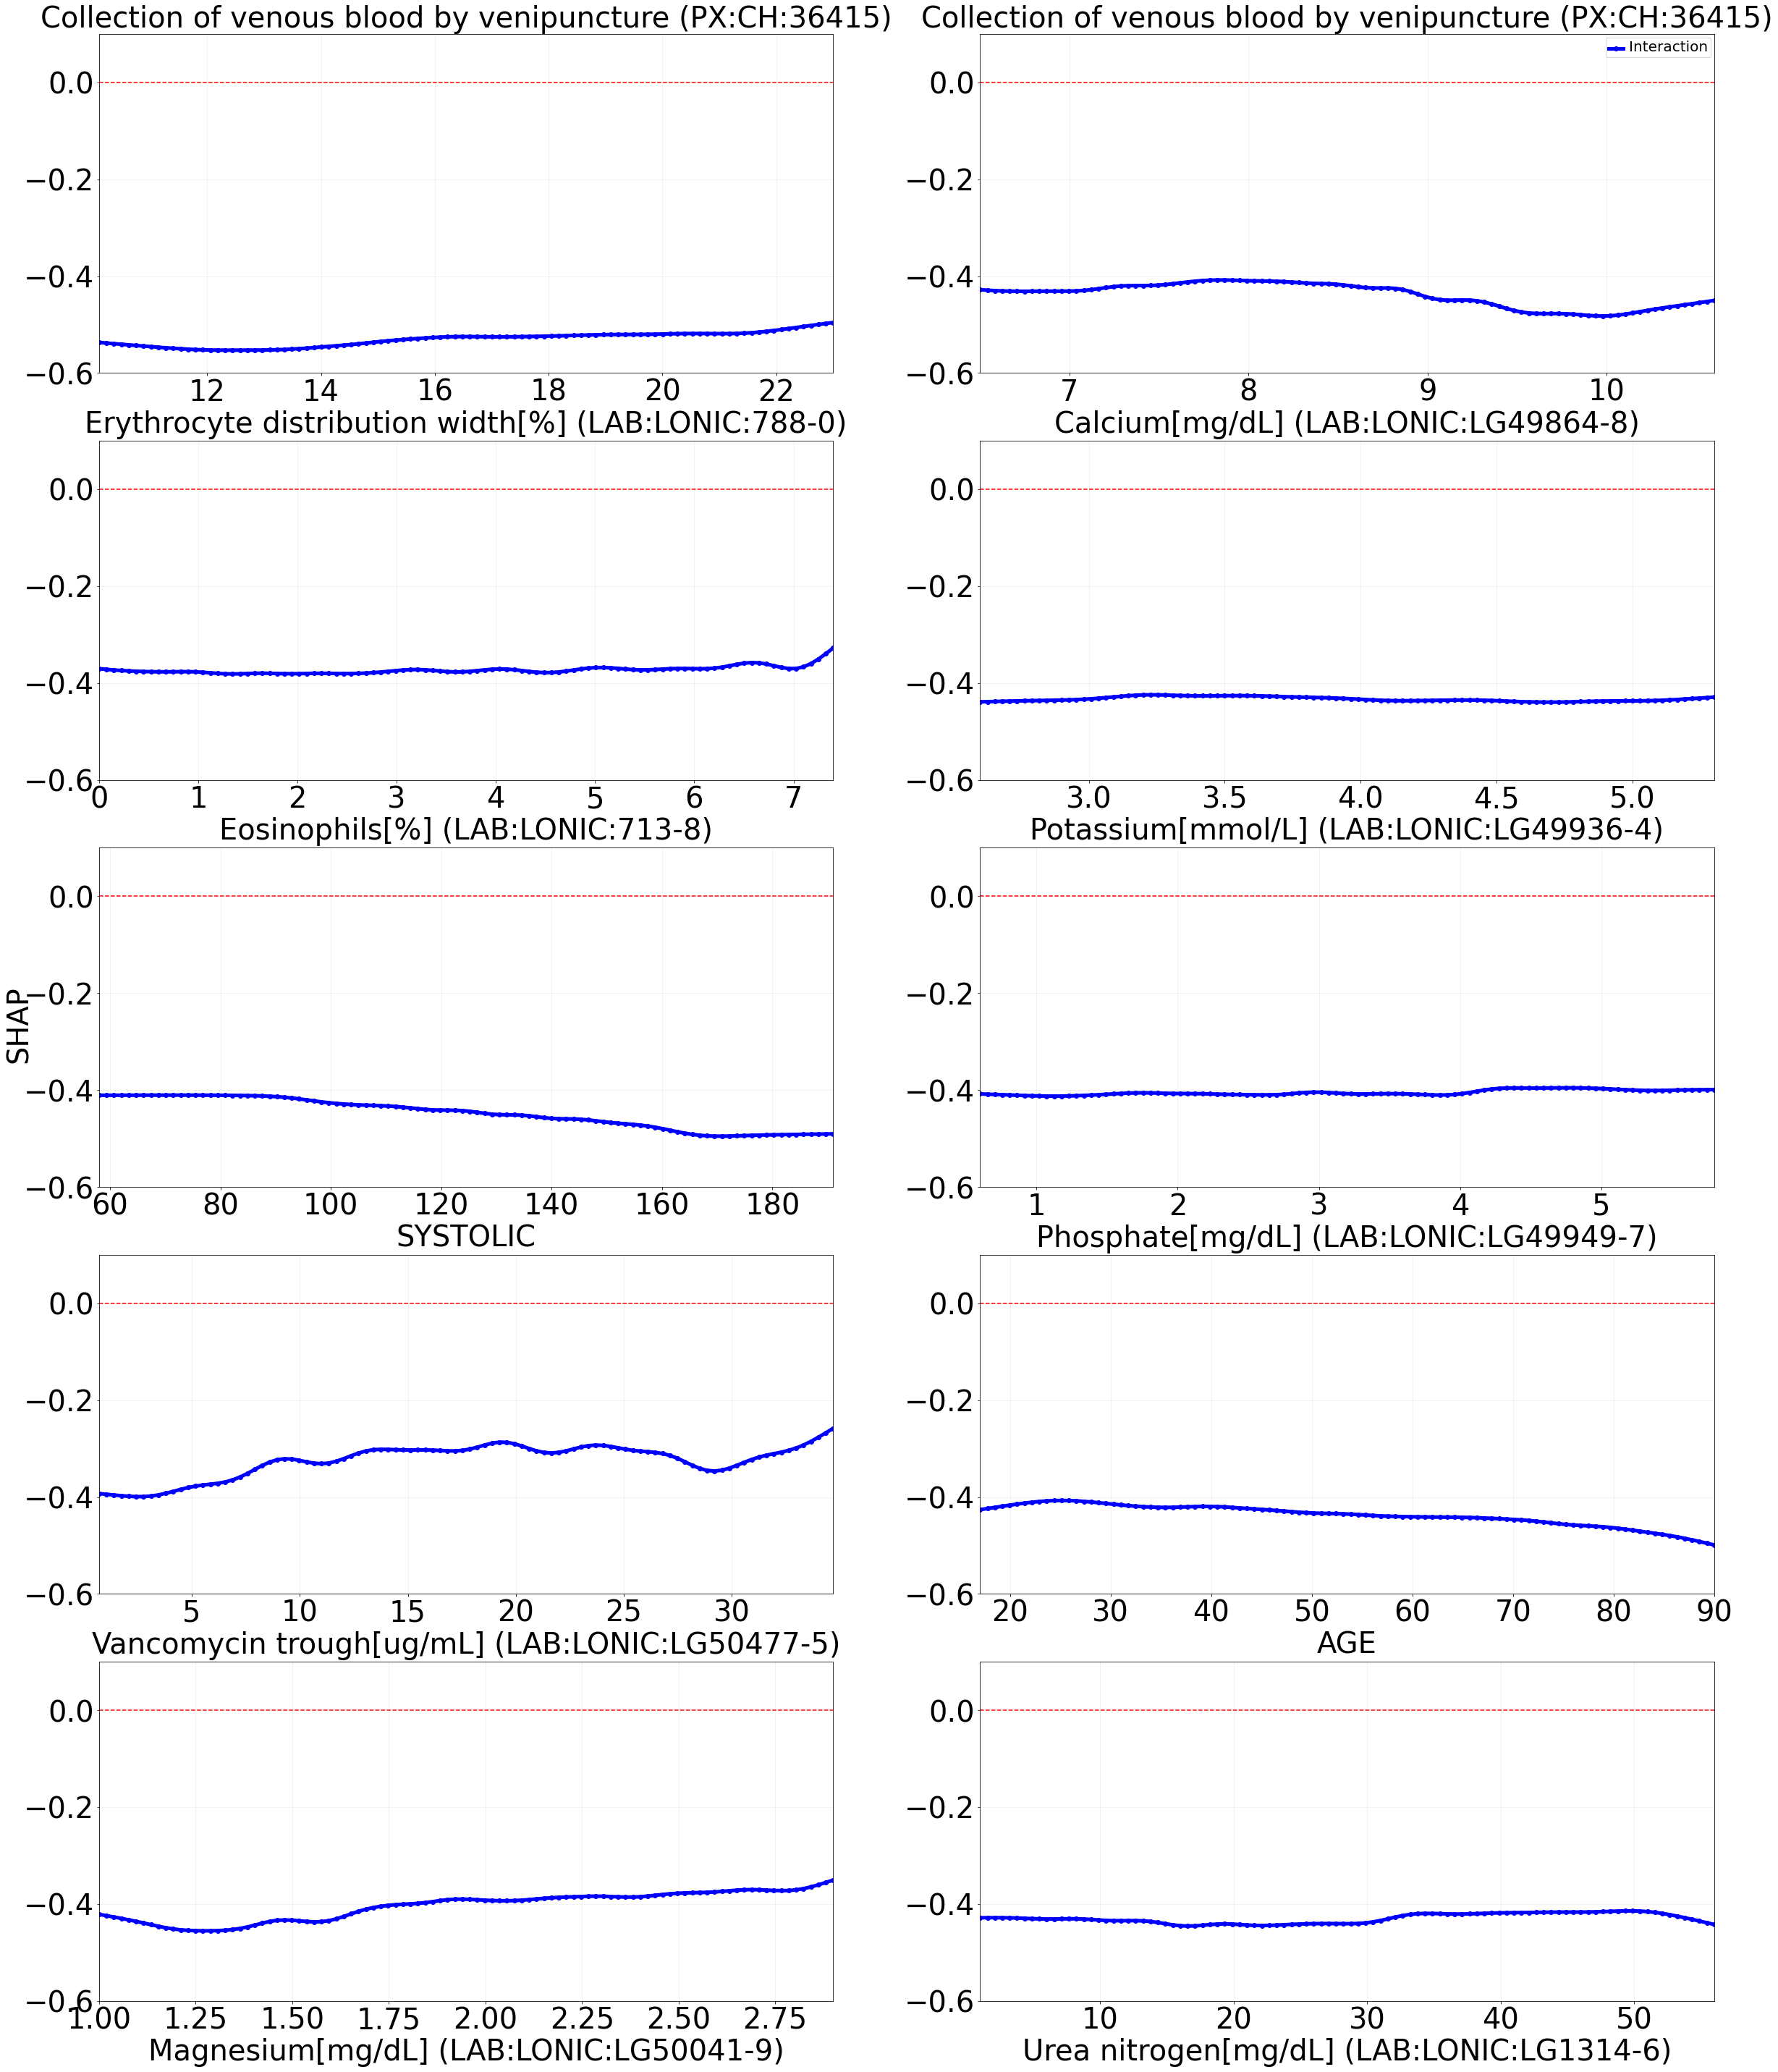

In [355]:
fig,ax = plotshapdi.plot_fig3_cat(ext_obj=plotshapsn, numrow=10, figsize=(40,50), font_ratio=2, external_select=top10f, mode='max_y', mode2='interact', suffix='_interact', rescale=(-0.6,0.1))

In [398]:
xxx.drop('-1',axis=1).sort_values('r.sq',ascending=False)

,intercept,interaction_intercept,r.sq
-1,,,
LAB::LG6657-3(mg/dL),0.0976566,-0.4089278,0.8771373
LAB::788-0(%),0.4072924,-0.5384763,0.8572973
LAB::LG49949-7(mg/dL),0.3048430,-0.4063698,0.7854123
LAB::LG7967-5(mg/dL),0.2852514,-0.4374054,0.7832703
LAB::LG1314-6(mg/dL),0.2867546,-0.4357481,0.7827167
LAB::LG49864-8(mg/dL),0.2699381,-0.4308862,0.7796226
DIASTOLIC,0.2976216,-0.4471331,0.7789009
LAB::LG49936-4(mmol/L),0.2694806,-0.4316616,0.7770885
LAB::LG50041-9(mg/dL),0.2069354,-0.3976390,0.7730089


/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1666: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_fit_feauture['r.sq'] = [x[0] for x in cat_fit_feauture['r.sq']]
/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cat_fit_feauture['intercept'] = [x[0] for x in cat_fit_feauture['p.coeff']]
/home/hoyinchan/code/AKI_CDM_PY/MetaRegression/plotmeta.py:1668: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a 

(<Figure size 2880x3600 with 10 Axes>,
 array([[<AxesSubplot:title={'center':'Collection of venous blood by venipuncture (PX:CH:36415)'}, xlabel='Erythrocyte distribution width[%] (LAB:LONIC:788-0)'>,
         <AxesSubplot:title={'center':'Collection of venous blood by venipuncture (PX:CH:36415)'}, xlabel='Calcium[mg/dL] (LAB:LONIC:LG49864-8)'>],
        [<AxesSubplot:xlabel='Eosinophils[%] (LAB:LONIC:713-8)'>,
         <AxesSubplot:xlabel='Potassium[mmol/L] (LAB:LONIC:LG49936-4)'>],
        [<AxesSubplot:xlabel='SYSTOLIC'>,
         <AxesSubplot:xlabel='Phosphate[mg/dL] (LAB:LONIC:LG49949-7)'>],
        [<AxesSubplot:xlabel='Vancomycin trough[ug/mL] (LAB:LONIC:LG50477-5)'>,
         <AxesSubplot:xlabel='AGE'>],
        [<AxesSubplot:xlabel='Magnesium[mg/dL] (LAB:LONIC:LG50041-9)'>,
         <AxesSubplot:xlabel='Urea nitrogen[mg/dL] (LAB:LONIC:LG1314-6)'>]],
       dtype=object))

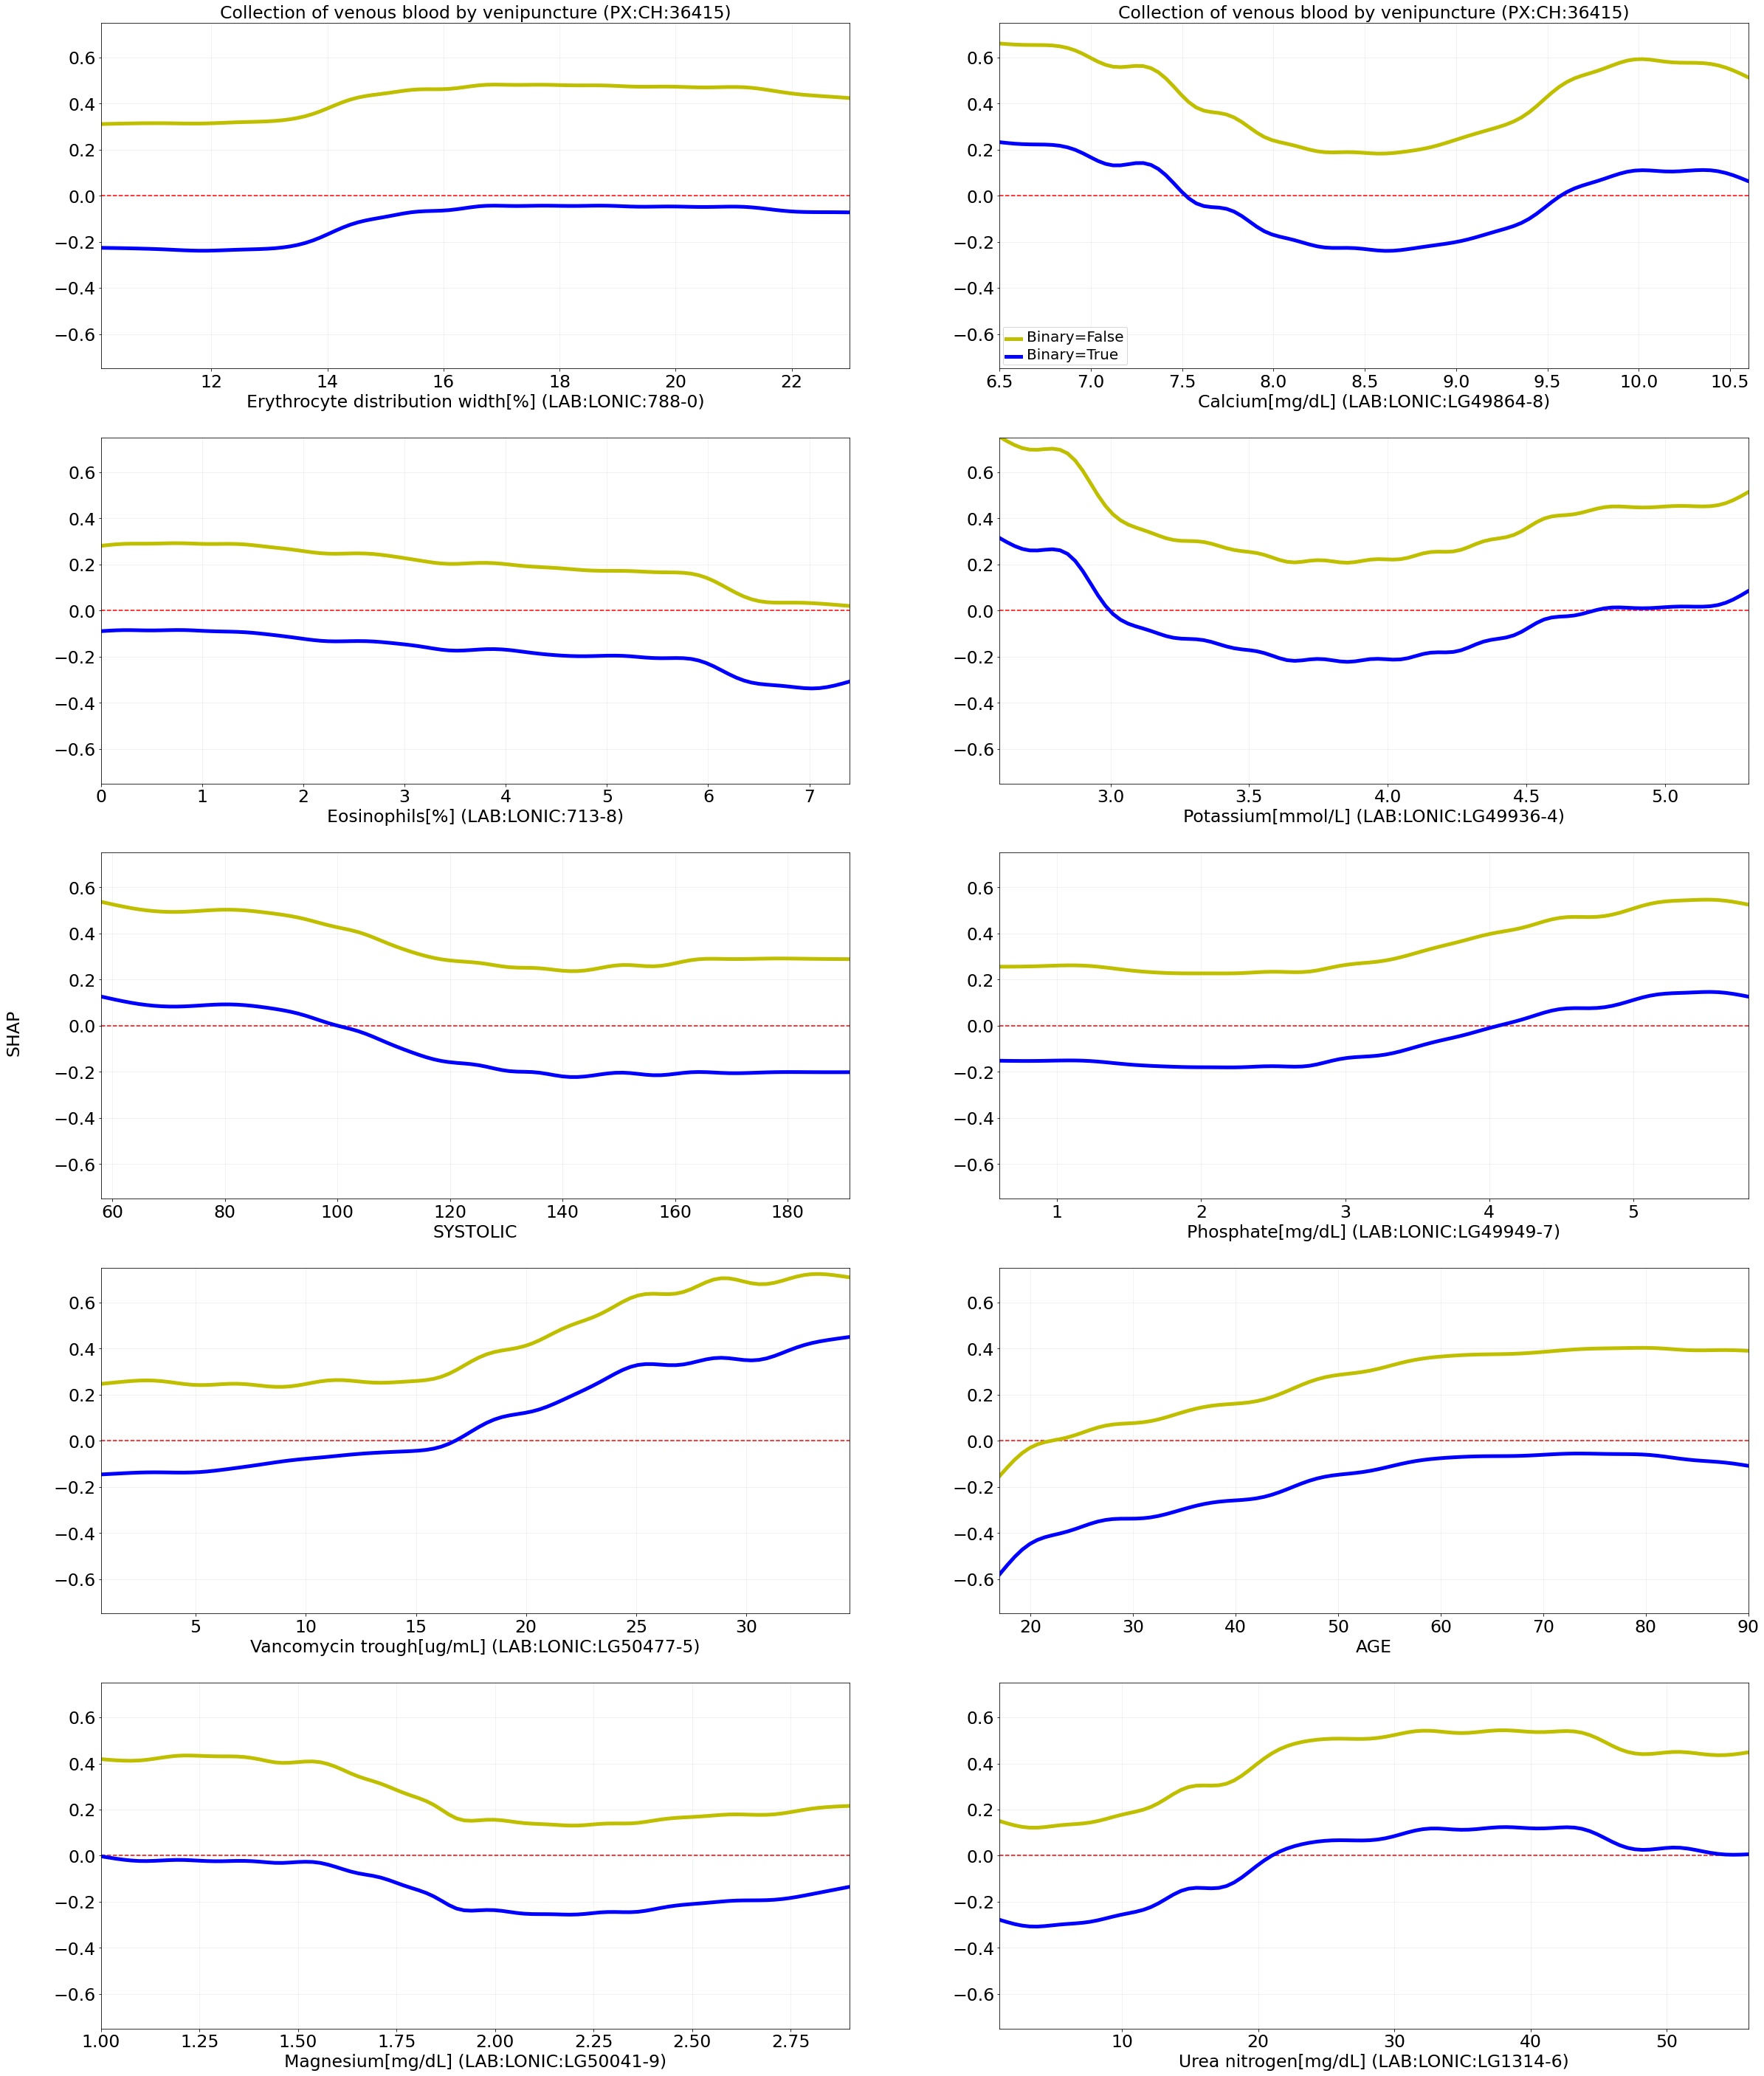

In [345]:
plot_fig3_cat(plotshapdi=plotshapdi, ext_obj=plotshapsn, numrow=10, figsize=(40,50), font_ratio=1.18, external_select=top10f, mode='max_y', mode2='nouni', suffix='_nouni', rescale=(-0.75,0.75))

In [341]:
    def plot_fig3_cat(self, ext_obj, numrow, figsize=None, suffix='', font_ratio=1, external_select=None, mode='max_y', mode2='all', rescale=None):
        # Define sizes for title, xd-label, and ticks
        title_size = 20*font_ratio  # Adjust size as needed
        xlabel_size = 20*font_ratio  # Adjust size as needed
        tick_size = 20*font_ratio  # Adjust size as needed
        legend_size = 20*font_ratio  # Adjust size as needed

        if figsize is None:
            figsize = (20, 5*numrow//2)

        cin2 = self.get_interaction_stat(ext_obj, mode=mode)            

        if external_select is not None:
            top10f = pd.DataFrame(external_select)
            top10f.columns = ['top10f']
            cin2 = cin2.merge(top10f, left_on=[-1], right_on=['top10f'], how='inner').drop('top10f',axis=1)

        # cin2o = cin2.copy()
        # cin2 = cin2.drop(-1,axis=1)
        # # Rename columns: _x to _tmp, _y to _x, and _tmp to _y
        # cin2.columns = [col.replace('_x', '_tmp') for col in cin2.columns]
        # cin2.columns = [col.replace('_y', '_x') for col in cin2.columns]
        # cin2.columns = [col.replace('_tmp', '_y') for col in cin2.columns]
        # # Rename the -1 column to '0_x'
        # cin2[-1] = cin2['0_y'].copy()
        # cin2 = cin2[cin2o.columns]get_cat_interaction_stat
        # cin2 = pd.concat([cin2, cin2o])
        # cin2 = cin2[cin2['r.sq_diff']>0]
        # cin2 = cin2.sort_values('r.sq_diff',ascending=False).groupby(-1).first().reset_index()            

        cin2 = cin2[[x in list(self.cattarget) for x in cin2['0_x']]]

        xxx = self.get_cat_interaction_feature()
        xxx['0_x'] = xxx.index
        cin2 = cin2[[-1, '0_x', 'r.sq_spline_y']].merge(xxx, on=[-1, '0_x'])
        cin2['r.sq_diff'] = cin2['r.sq']-cin2['r.sq_spline_y']        

        cin2 = cin2[cin2['r.sq_diff']>0]
        cin2 = cin2.sort_values('r.sq_diff', ascending=False)
        cin2 = cin2.groupby('0_x').head(numrow).reset_index()
        cin2 = cin2.sort_values(['0_x', 'r.sq_diff'], ascending=False).reset_index(drop=True)

        if len(cin2['0_x'].unique()) == 2:
            fig, ax = plt.subplots(numrow//2, 4, figsize=figsize)        
            midpoint = 0.505
            # Add a line at the midpoint. This requires converting the midpoint to the figure's coordinate system.
            line = Line2D([midpoint, midpoint], [0.1, 0.89], transform=fig.transFigure, color="grey", linestyle="--")
            fig.add_artist(line)   
        else:
            fig, ax = plt.subplots(numrow//2, 2, figsize=figsize)                

        for i in cin2.index:
            i1 = int(np.floor(i/(numrow//2)))
            i2 = int(i-np.floor(i/(numrow//2))*(numrow//2))   
            self.plot_meta2_cat(cin2.loc[i,-1], cin2.loc[i,'0_x'], ext_obj=ext_obj, ax=ax[i2][i1], verbose=False, legend_size=legend_size, mode2=mode2)      

           # Set x_label for each subplot with increased size

            if len(cin2['0_x'].unique()) == 2:        
                ax[i2][i1].set_xlabel(self.translator.custom_translate_omop_2022_2_fig2(cin2.loc[i, -1]), fontsize=xlabel_size)
            else:
                ax[i2][i1].set_xlabel(self.translator.custom_translate_omop_2022_2_outtable(cin2.loc[i, -1]), fontsize=xlabel_size)

            # Set title for the first row subplots with increased size
            if i2 == 0:
                if len(cin2['0_x'].unique()) == 2:
                    ax[i2][i1].set_title(self.translator.custom_translate_omop_2022_2_fig2(cin2.loc[i, '0_x']), fontsize=title_size)
                else:
                    ax[i2][i1].set_title(self.translator.custom_translate_omop_2022_2_outtable(cin2.loc[i, '0_x']), fontsize=title_size)
            # Increase tick size
            ax[i2][i1].tick_params(axis='both', which='major', labelsize=tick_size)
            # Remove legends from all subplots
            ax[i2][i1].legend().set_visible(False)

            if rescale is not None:
                ax[i2][i1].set_ylim(rescale[0], rescale[1])  # Set the y-axis range              

        # Only enable legend for the top right subplot
        ax[0][-1].legend().set_visible(True)            
        ax[0][-1].legend().get_title().set_fontsize(legend_size)            
        for text in ax[0][-1].legend().get_texts():
            text.set_fontsize(20)  # Increase legend fontsize

        # Set a common y_label for all subplots
        fig.text(0.08, 0.5, 'SHAP', va='center', rotation='vertical', fontsize=xlabel_size)

        fig.savefig(f"meta_double_cat{suffix}.svg", bbox_inches ='tight')     
        return fig,ax

1